In [48]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load the JSON data from the file
with open('biostimulant_test/data.json', 'r') as file:
    data = json.load(file)
data

{'testName': 'seaweed extract validation test',
 'testDetails': 'seaweed biostimulant test on Brasica carinata.PSL(palmaria from seaweed land), USL(ulva from seaweed land),UT(ulva from texel) and CO(control group).Bottom is christa, Top is eleven',
 'steps': 3,
 'devices': [{'url': 'http://cam1.local:8000/', 'name': 'BOTTOM'},
  {'url': 'http://cam2.local:8000/', 'name': 'TOP'}],
 'dateRange': ['2025-02-25T14:42:00.000Z', '2025-04-08T13:42:00.000Z'],
 'watering': None,
 'daylight': [{'hours': 6, 'minutes': 0, 'seconds': 0},
  {'hours': 22, 'minutes': 0, 'seconds': 0}],
 'environment_variables': [{'Time': '2025-02-25T14:43:10.220548+00:00',
   'Temperature': [24.246967269398027, 24.271000228885327],
   'Humidity': [40.341802090486, 38.181124589913786]},
  {'Time': '2025-02-25T16:53:25.327309+00:00',
   'Temperature': [26.746395056076906, 27.283131151293205],
   'Humidity': [39.092088197146566, 35.95025558861677]},
  {'Time': '2025-02-25T19:03:39.283745+00:00',
   'Temperature': [26.5461

In [50]:
# Flatten the 'devices' and 'daylight' lists separately
devices_df = pd.json_normalize(data['devices'])
daylight_df = pd.json_normalize(data['daylight'])
env_vars_df = pd.json_normalize(data['environment_variables'])

# Extract the simple key-value pairs into a separate dictionary
simple_data = {
    "testName": data['testName'],
    "testDetails": data['testDetails'],
    "dateRange": data['dateRange']}

In [51]:
env_vars_df 

,Time,Temperature,Humidity
0,2025-02-25T14:43:10.220548+00:00,"[24.246967269398027, 24.271000228885327]","[40.341802090486, 38.181124589913786]"
1,2025-02-25T16:53:25.327309+00:00,"[26.746395056076906, 27.283131151293205]","[39.092088197146566, 35.95025558861677]"
2,2025-02-25T19:03:39.283745+00:00,"[26.54612039368277, 27.00007629510948]","[39.32555123216602, 37.177080949111165]"
3,2025-02-26T05:14:26.333757+00:00,"[23.865110246433204, 23.974593728542004]","[41.187151903562985, 36.90089265278095]"
4,2025-02-26T07:25:11.422207+00:00,"[26.121538109407183, 26.578164339665832]","[37.047379262989246, 33.925383382925155]"
...,...,...,...
59,2025-03-05T20:30:22.302552+00:00,"[26.121538109407183, 26.604867627985044]","[39.728389410238805, 33.711757076371406]"
60,2025-03-06T06:40:37.094649+00:00,"[24.829098954757, 25.200274662394136]","[33.162432288090336, 31.824216067750058]"
61,2025-03-06T08:50:50.632193+00:00,"[25.141527428091862, 25.64888990615701]","[36.22949568932631, 32.81452658884565]"
62,2025-03-06T11:01:04.744128+00:00,"[25.582131685358974, 26.24170290684367]","[41.38094148165103, 36.142519264515144]"


In [52]:
# Convert the 'Time' column in the environment variables DataFrame to datetime
env_vars_df['Time'] = pd.to_datetime(env_vars_df['Time'])
# Separate date and time into two columns for 'Time'
env_vars_df['Date'] = env_vars_df['Time'].dt.date
env_vars_df['time'] = env_vars_df['Time'].dt.strftime('%H:%M')
# env_vars_df.drop(columns=['Time'], inplace=True)
# Reorder columns to bring 'Date' and 'Time_Formatted' to the front
env_vars_df = env_vars_df[['Date', 'time', 'Temperature', 'Humidity']]
env_vars_df

,Date,time,Temperature,Humidity
0,2025-02-25,14:43,"[24.246967269398027, 24.271000228885327]","[40.341802090486, 38.181124589913786]"
1,2025-02-25,16:53,"[26.746395056076906, 27.283131151293205]","[39.092088197146566, 35.95025558861677]"
2,2025-02-25,19:03,"[26.54612039368277, 27.00007629510948]","[39.32555123216602, 37.177080949111165]"
3,2025-02-26,05:14,"[23.865110246433204, 23.974593728542004]","[41.187151903562985, 36.90089265278095]"
4,2025-02-26,07:25,"[26.121538109407183, 26.578164339665832]","[37.047379262989246, 33.925383382925155]"
...,...,...,...,...
59,2025-03-05,20:30,"[26.121538109407183, 26.604867627985044]","[39.728389410238805, 33.711757076371406]"
60,2025-03-06,06:40,"[24.829098954757, 25.200274662394136]","[33.162432288090336, 31.824216067750058]"
61,2025-03-06,08:50,"[25.141527428091862, 25.64888990615701]","[36.22949568932631, 32.81452658884565]"
62,2025-03-06,11:01,"[25.582131685358974, 26.24170290684367]","[41.38094148165103, 36.142519264515144]"


In [53]:
# Create separate columns for Temperature Bottom, Temperature Top, Humidity Bottom, Humidity Top
env_vars_df['Temperature Bottom'] = env_vars_df['Temperature'].apply(lambda x: x[0])
env_vars_df['Temperature Top'] = env_vars_df['Temperature'].apply(lambda x: x[1])
env_vars_df['Humidity Bottom'] = env_vars_df['Humidity'].apply(lambda x: x[0])
env_vars_df['Humidity Top'] = env_vars_df['Humidity'].apply(lambda x: x[1])

# Drop the original lists (optional)
env_vars_df.drop(columns=['Temperature', 'Humidity'], inplace=True)
env_vars_df

,Date,time,Temperature Bottom,Temperature Top,Humidity Bottom,Humidity Top
0,2025-02-25,14:43,24.246967,24.271000,40.341802,38.181125
1,2025-02-25,16:53,26.746395,27.283131,39.092088,35.950256
2,2025-02-25,19:03,26.546120,27.000076,39.325551,37.177081
3,2025-02-26,05:14,23.865110,23.974594,41.187152,36.900893
4,2025-02-26,07:25,26.121538,26.578164,37.047379,33.925383
...,...,...,...,...,...,...
59,2025-03-05,20:30,26.121538,26.604868,39.728389,33.711757
60,2025-03-06,06:40,24.829099,25.200275,33.162432,31.824216
61,2025-03-06,08:50,25.141527,25.648890,36.229496,32.814527
62,2025-03-06,11:01,25.582132,26.241703,41.380941,36.142519


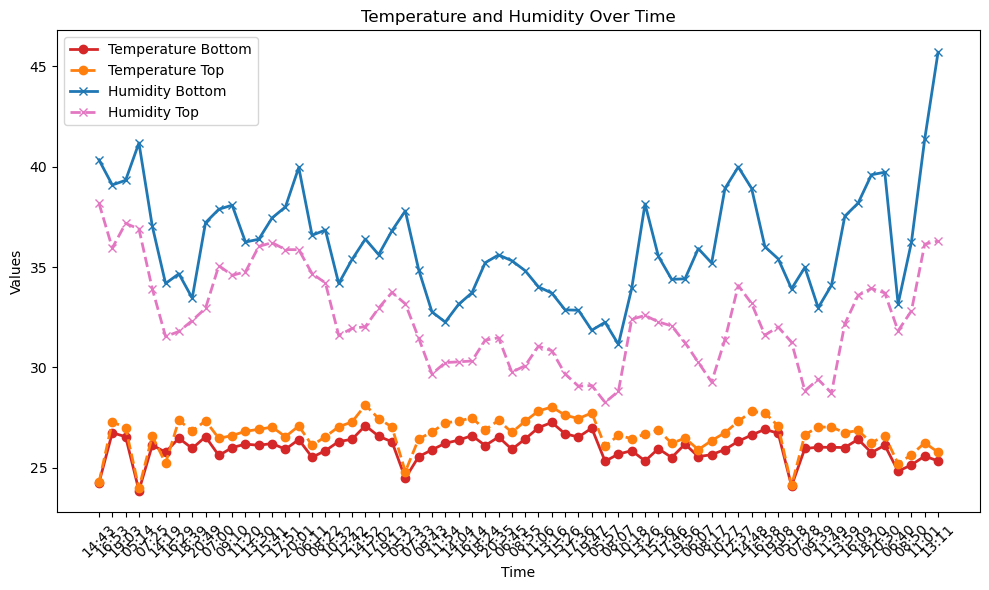

In [61]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot Temperature
plt.plot(env_vars_df['time'], env_vars_df['Temperature Bottom'], label='Temperature Bottom', color='tab:red', marker='o', linestyle='-', linewidth=2)
plt.plot(env_vars_df['time'], env_vars_df['Temperature Top'], label='Temperature Top', color='tab:orange', marker='o', linestyle='--', linewidth=2)

# Plot Humidity
plt.plot(env_vars_df['time'], env_vars_df['Humidity Bottom'], label='Humidity Bottom', color='tab:blue', marker='x', linestyle='-', linewidth=2)
plt.plot(env_vars_df['time'], env_vars_df['Humidity Top'], label='Humidity Top', color='tab:pink', marker='x', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Temperature and Humidity Over Time')

# Rotate x-axis labels to make them more readable
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()